In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path=r"Company_Data.csv"
df1=pd.read_csv(path)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df1.loc[df1['Sales']>10, ['Sales_df']]='high'
df1.loc[df1['Sales']<10, ['Sales_df']]='low'

In [4]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_df
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,low
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [5]:
categorical_columns=df1.select_dtypes(include=['object'])

In [6]:
categorical_columns

,ShelveLoc,Urban,US,Sales_df
0,Bad,Yes,Yes,low
1,Good,Yes,Yes,high
2,Medium,Yes,Yes,high
3,Medium,Yes,Yes,low
4,Bad,Yes,No,low
...,...,...,...,...
395,Good,Yes,Yes,high
396,Medium,No,Yes,low
397,Medium,Yes,Yes,low
398,Bad,Yes,Yes,low


In [7]:
categorical_columns1=pd.get_dummies(categorical_columns,drop_first=True)

In [8]:
categorical_columns1

,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_df_low
0,0,0,1,1,1
1,1,0,1,1,0
2,0,1,1,1,0
3,0,1,1,1,1
4,0,0,1,0,1
...,...,...,...,...,...
395,1,0,1,1,0
396,0,1,0,1,1
397,0,1,1,1,1
398,0,0,1,1,1


In [9]:
df1=df1.drop(categorical_columns,axis=1)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [10]:
df1=pd.concat([df1,categorical_columns1],axis=1)

In [11]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_df_low
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0
3,7.40,117,100,4,466,97,55,14,0,1,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1,1


In [12]:
X=df1.iloc[:,1:11]

In [13]:
y=df1.iloc[:,12]

In [14]:
print(X)

     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  
0                 0                 0          1  
1        

In [15]:
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales_df_low, Length: 400, dtype: uint8


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 10)
(80, 10)
(320,)
(80,)


In [19]:
from sklearn import tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [21]:
decisiontree_classifier=DecisionTreeClassifier()

In [22]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

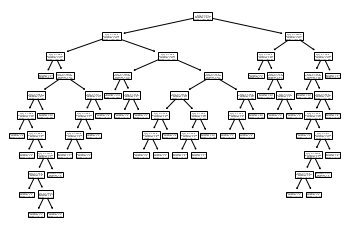

In [24]:
tree.plot_tree(model);

In [25]:
df1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes', 'Sales_df_low'],
      dtype='object')

In [26]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes'],
      dtype='object')

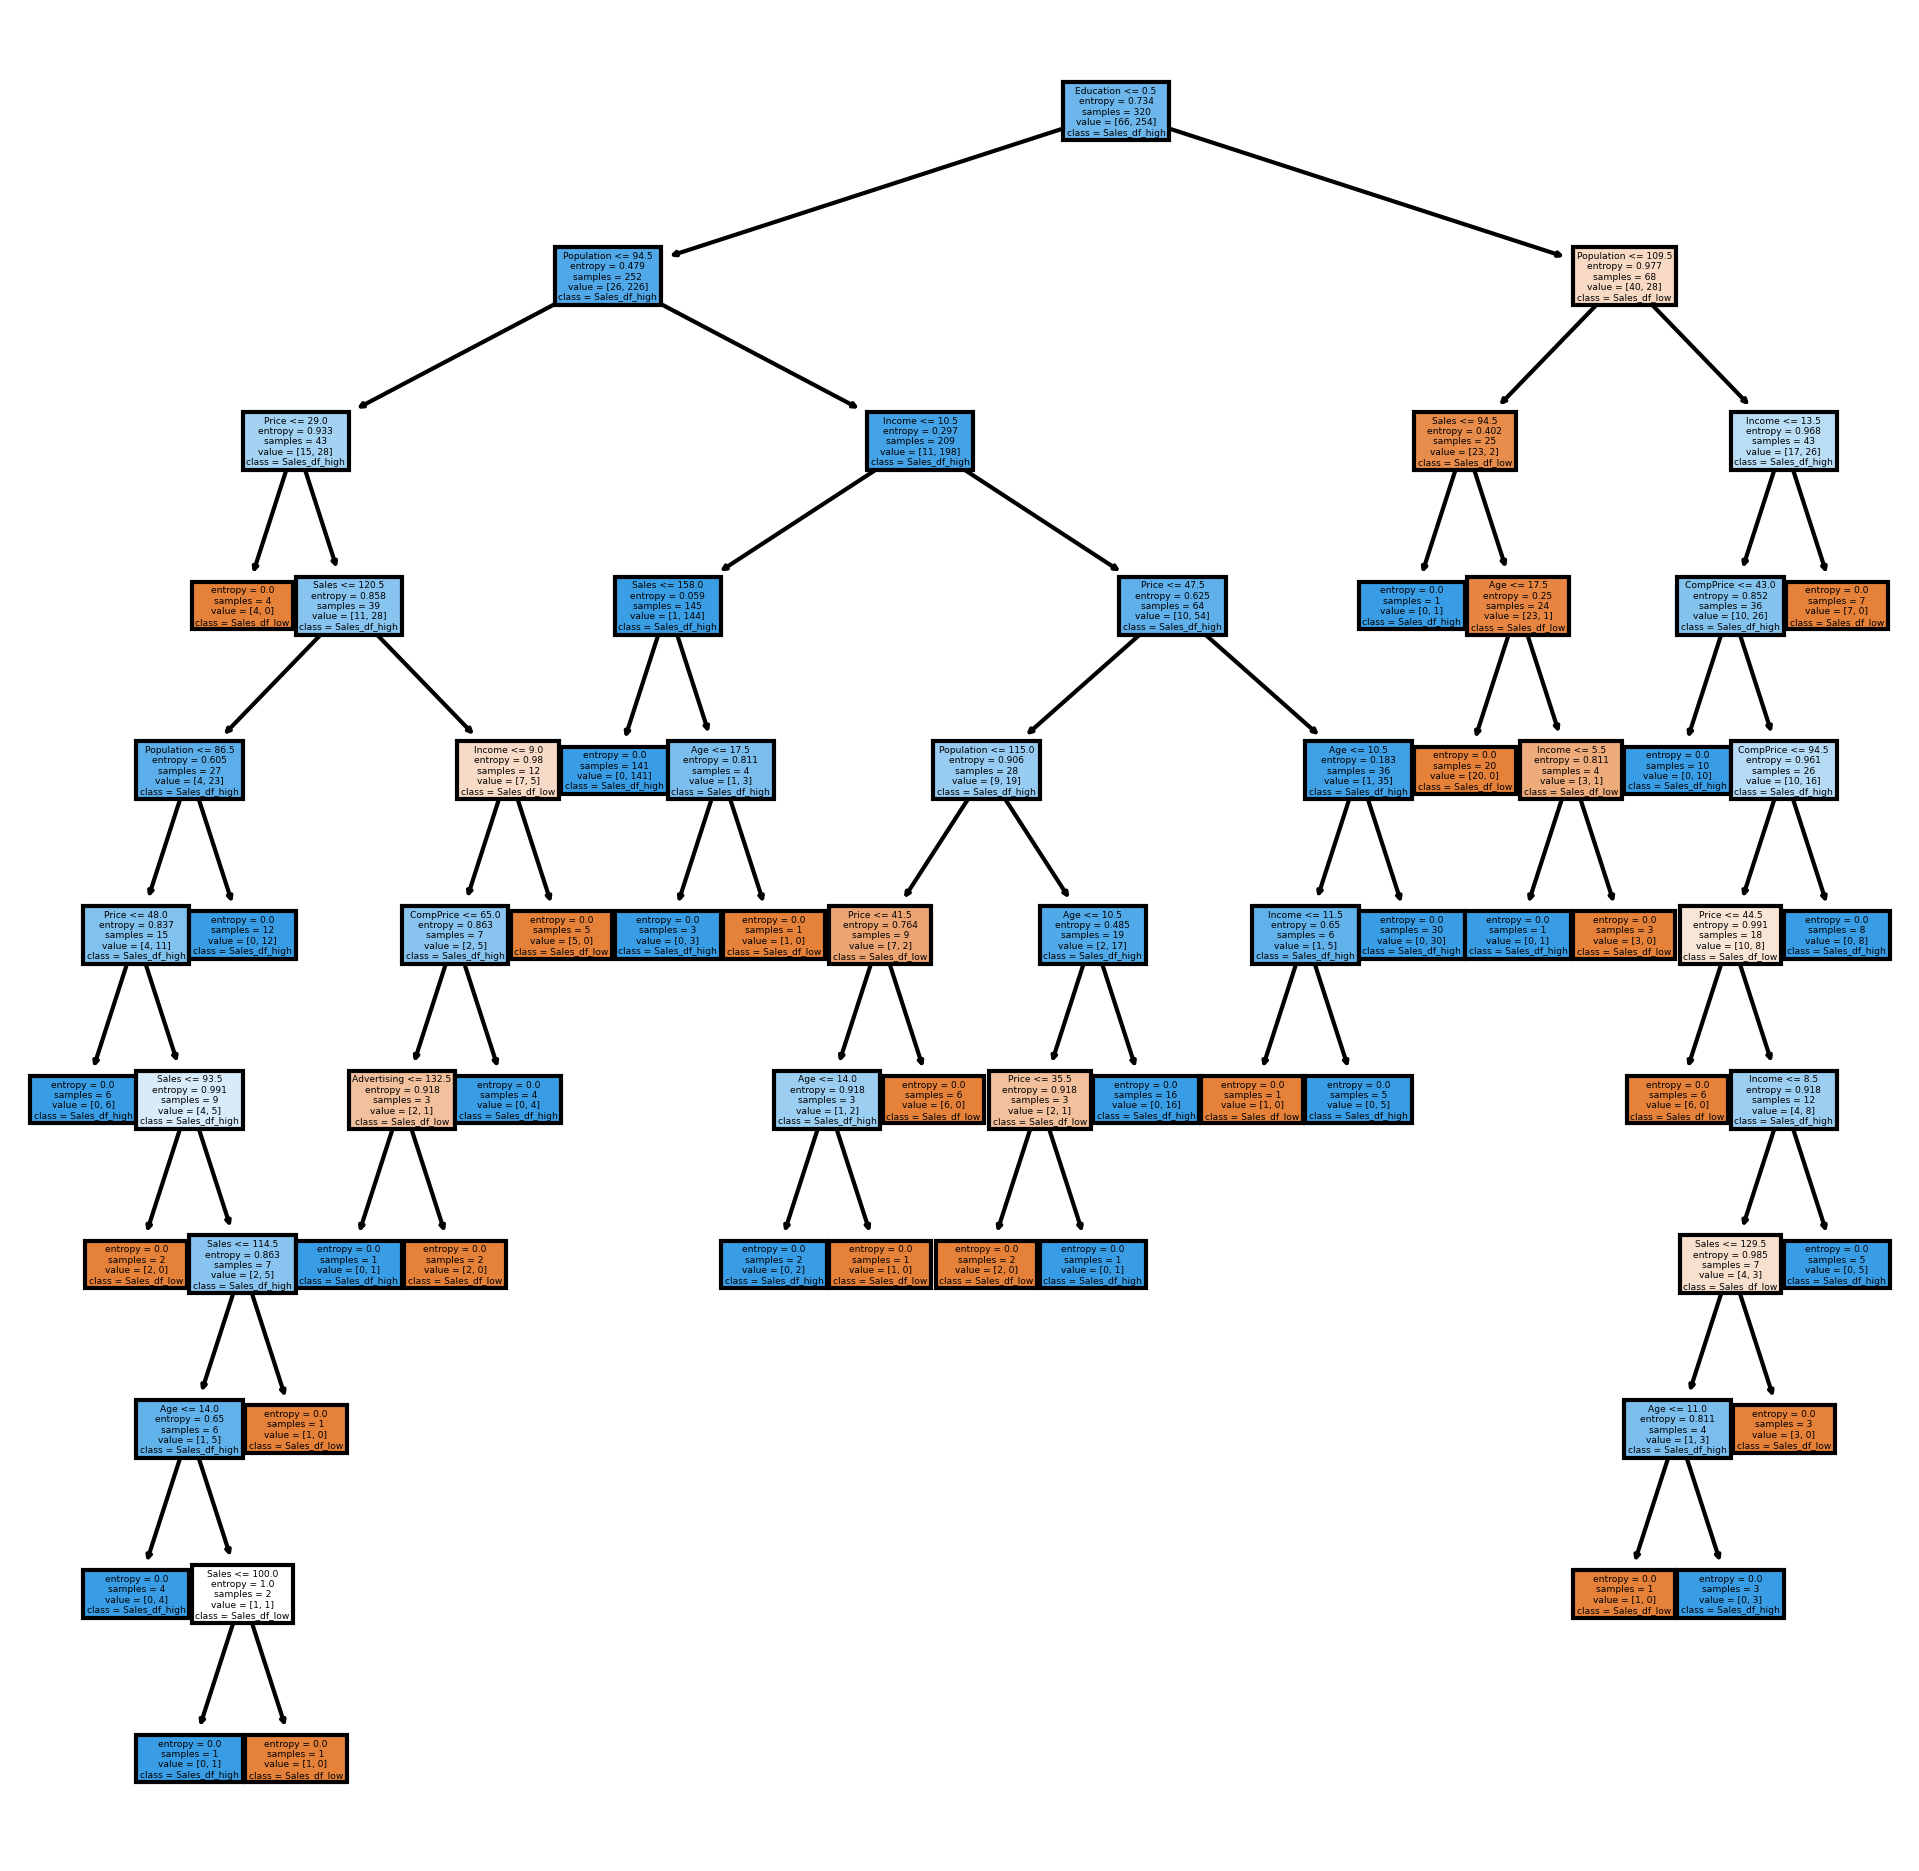

In [27]:
fn=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes','US_Yes',]
cn=['Sales_df_low','Sales_df_high']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [28]:
preds=model.predict(X_test)

In [29]:
preds

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [30]:
pd.Series(preds).value_counts()

1    69
0    11
dtype: int64

In [31]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_df_low,,
0,4,9
1,7,60


In [32]:
np.mean(preds==y_test)

0.8

# Gini Criteria

In [33]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=10)

In [34]:
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [35]:
pred=model_gini.predict(X_test)

In [36]:
np.mean(pred==y_test)

0.8375

# DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_df_low
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0
3,7.40,117,100,4,466,97,55,14,0,1,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1,1


In [39]:
df2=df1.values

In [40]:
df2

array([[  9.5 , 138.  ,  73.  , ...,   1.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,   1.  ,   0.  ],
       [ 10.06, 113.  ,  35.  , ...,   1.  ,   1.  ,   0.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   1.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,   1.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,   1.  ,   1.  ]])

In [41]:
df2

array([[  9.5 , 138.  ,  73.  , ...,   1.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,   1.  ,   0.  ],
       [ 10.06, 113.  ,  35.  , ...,   1.  ,   1.  ,   0.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   1.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,   1.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,   1.  ,   1.  ]])

In [42]:
X=df2[:,1:11]

y=df2[:,-1]

In [43]:
print(X)

[[138.  73.  11. ...   0.   0.   1.]
 [111.  48.  16. ...   1.   0.   1.]
 [113.  35.  10. ...   0.   1.   1.]
 ...
 [162.  26.  12. ...   0.   1.   1.]
 [100.  79.   7. ...   0.   0.   1.]
 [134.  37.   0. ...   1.   0.   1.]]


In [44]:
print(y)

[1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [46]:
model1=DecisionTreeRegressor()

In [47]:
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
model1.score(X_test,y_test)

-0.2648221343873516